# Linear Regression

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Tune Parameters
ปรับ parameter ด้วยมือ (ใช้ data อื่น ที่น่าสนใจสำหรับเด็กกว่านี้ แล้วทำให้สามารถอัพโหลด ใส่ในกราฟได้)

In [10]:
@interact
def show_articles_more_than(m=1000, c=100):
    # Make predictions using the testing set
    regr.coef_[0] = m
    regr.intercept_ = c
    diabetes_y_pred = regr.predict(diabetes_X_test)

    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

    plt.xlim=(-0.1, 0.15)
    plt.ylim=(0, 350)
    plt.show()
    return m, c

interactive(children=(IntSlider(value=1000, description='m', max=3000, min=-1000), IntSlider(value=100, descri…

ปรับ parameters 2 อย่าง (3D)

In [11]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:,[0,2]]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(regr.coef_)
print(regr.intercept_)

[139.20420118 912.45355549]
152.8767000140564


In [14]:
diabetes_X_train.max(axis=0)

array([0.11072668, 0.17055523])

In [15]:
diabetes_X_train.min(axis=0)

array([-0.10722563, -0.0902753 ])

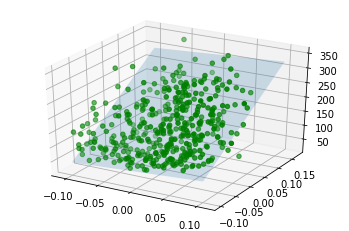

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[a1, a2] = regr.coef_
d = regr.intercept_

# create x,y
xx, yy = np.meshgrid(np.linspace(-0.1,0.1,10), np.linspace(-0.1,0.17,10))

# calculate corresponding z
zz = a1*xx + a2*yy + d

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zz, alpha=0.2)

#and i would like to plot this point : 
plt3d.scatter(diabetes_X_train[:,0] , diabetes_X_train[:,1] , diabetes_y_train,  color='green')
#


In [55]:
import plotly.graph_objs as go

fig = go.FigureWidget(data=[go.Scatter3d(x=diabetes_X_train[:,0], y=diabetes_X_train[:,1] , z=diabetes_y_train, mode='markers'),
                      go.Surface(x=xx, y=yy, z=zz)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter3d',
              'uid': '01f4a…

In [56]:
@interact
def show_articles_more_than(a1=139, a2=912, d=152):
    # Make predictions using the testing set
    zz = a1*xx + a2*yy + d
    bar = fig.data[1]
    bar.z = zz
    return 

interactive(children=(IntSlider(value=139, description='a1', max=417, min=-139), IntSlider(value=912, descript…

# Sampling Data

การเลือกข้อมูล หรือ sampling มีผลต่อ model ที่ได้ (เลือกใช้ข้อมูลที่น่าสนใจกับ นร. มากกว่านี้)

1. เลือกข้อมูลจากทุก กลุ่มข้อมูล population เพื่อไม่ให้มี Bias  

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

@interact
def show_articles_more_than(groups=['A', 'B', 'C']):
    # Make predictions using the testing set
    # Train the model using the training sets
    if groups == 'A':
        idx = diabetes_X_train > -np.inf
        regr.fit(diabetes_X_train, diabetes_y_train)
    elif groups == 'B':
        idx = diabetes_X_train > 0.1
    else:
        idx = diabetes_X_train < -0.05
        
    regr.fit(diabetes_X_train[idx,np.newaxis], diabetes_y_train[idx.flatten()])
    
    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(diabetes_y_test, diabetes_y_pred))

    # Plot outputs
    plt.scatter(diabetes_X_train[idx,np.newaxis], diabetes_y_train[idx.flatten()],  color='black')
    plt.scatter(diabetes_X_train[~idx,np.newaxis], diabetes_y_train[~idx.flatten()],  color='gray')
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='cyan')
    
    plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

    plt.show()

2. เลือกข้อมูล ให้มีปริมาณพอ ๆ กัน เพื่อป้องกัน imbalanced data

# Tune Parameters Automatically
การใช้สูตรทางคณิตศาสตร์ช่วยในการปรับค่า Parameter

In [ ]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## ให้ลองใช้ Linear Regression แก้ปัญหาจริง